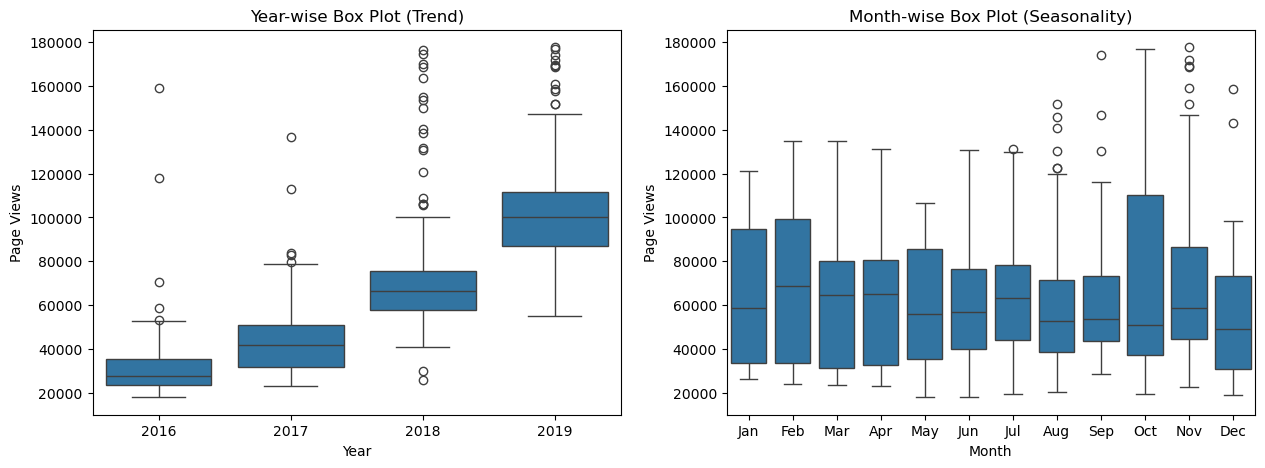

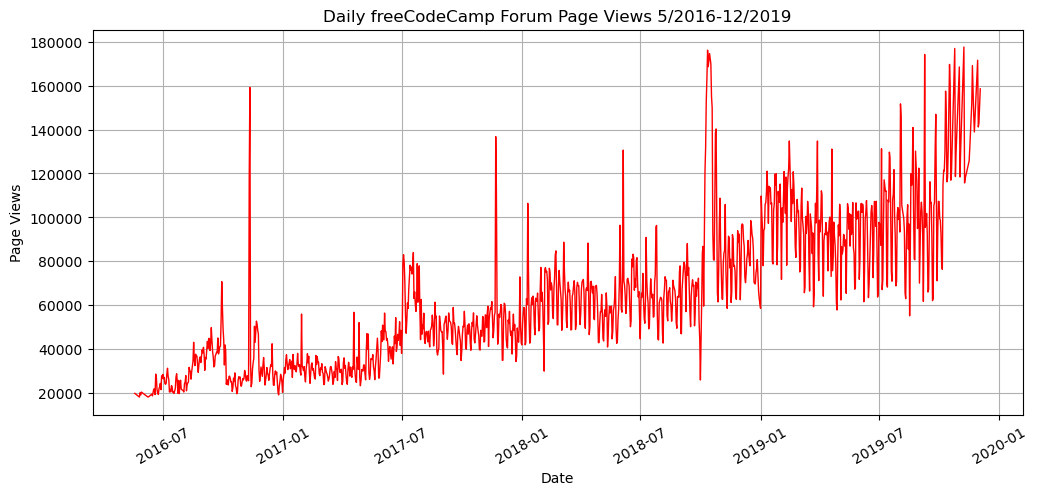

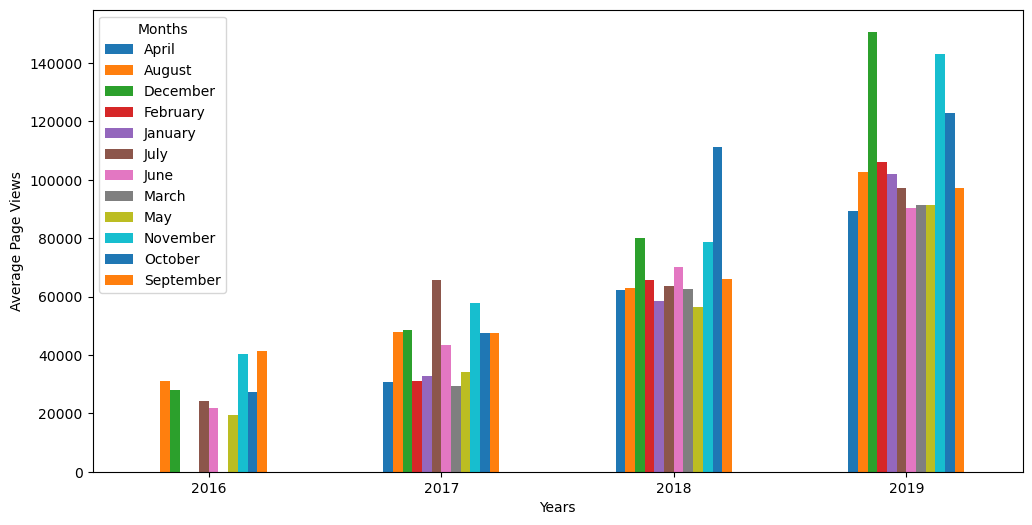

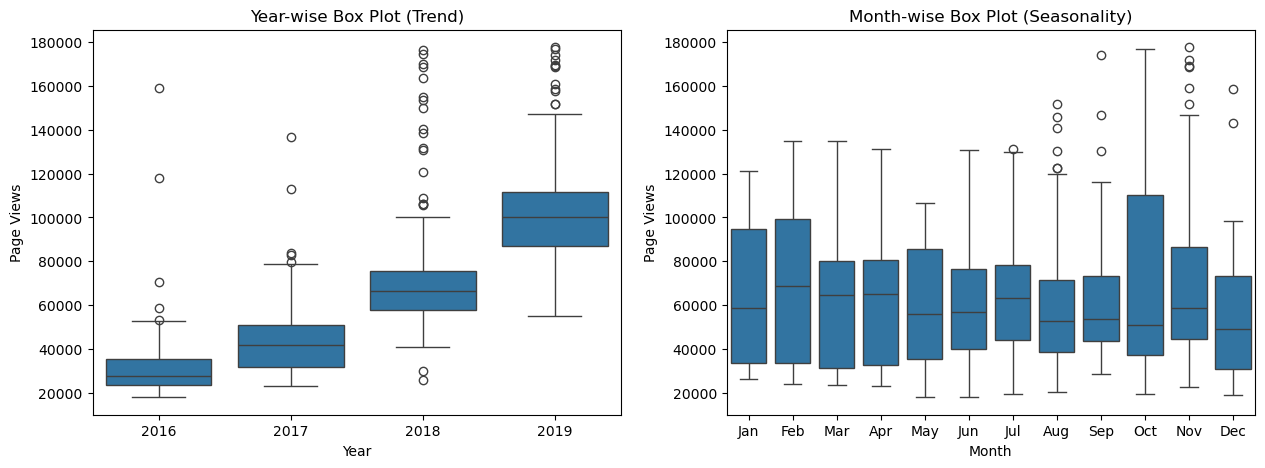

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=True)

# Clean the data by removing outliers (top & bottom 2.5%)
lower_bound = df["value"].quantile(0.025)
upper_bound = df["value"].quantile(0.975)
df = df[(df["value"] >= lower_bound) & (df["value"] <= upper_bound)]


# Function to draw line plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(df.index, df["value"], color="red", linewidth=1)
    
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    plt.xticks(rotation=30)
    plt.grid(True)
    
    # Save and return figure
    fig.savefig('line_plot.png')
    return fig


# Function to draw bar plot
def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()

    df_grouped = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    fig = df_grouped.plot(kind="bar", figsize=(12, 6)).get_figure()
    
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months")
    plt.xticks(rotation=0)
    
    fig.savefig("bar_plot.png")
    return fig


# Function to draw box plots
def draw_box_plot():
    df_box = df.copy()
    df_box["year"] = df_box.index.year
    df_box["month"] = df_box.index.month_name().str[:3]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig("box_plot.png")
    return fig


# Call functions to generate plots
draw_line_plot()
draw_bar_plot()
draw_box_plot()
